In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizando os valores pixel em uma faixa entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Remodelando as imagens para (28, 28, 1) para entrada CNN
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [4]:
# Construindo o modelo de Rede Neural Convolucional
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), #achatamento
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # regularizando
    layers.Dense(10, activation='softmax')
])

In [5]:
# Compilando o modelo, especificando a funcao de perda, o otimizador e as metricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Treinamento do modelo usando os dados de treinamento
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2039 - accuracy: 0.9382 - val_loss: 0.0449 - val_accuracy: 0.9851
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0327 - val_accuracy: 0.9896
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0598 - accuracy: 0.9822 - val_loss: 0.0298 - val_accuracy: 0.9897
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 5/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0227 - val_accuracy: 0.9928
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0261 - val_accuracy: 0.9912
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0231 -

In [7]:
# Avaliação de desempenho do modelo no conjunto de dados de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisão do teste: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0292 - accuracy: 0.9931
Precisão do teste: 0.9930999875068665


In [8]:
# Utilizando o modelo treinado para fazer previsões sobre dados novos e não vistos
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


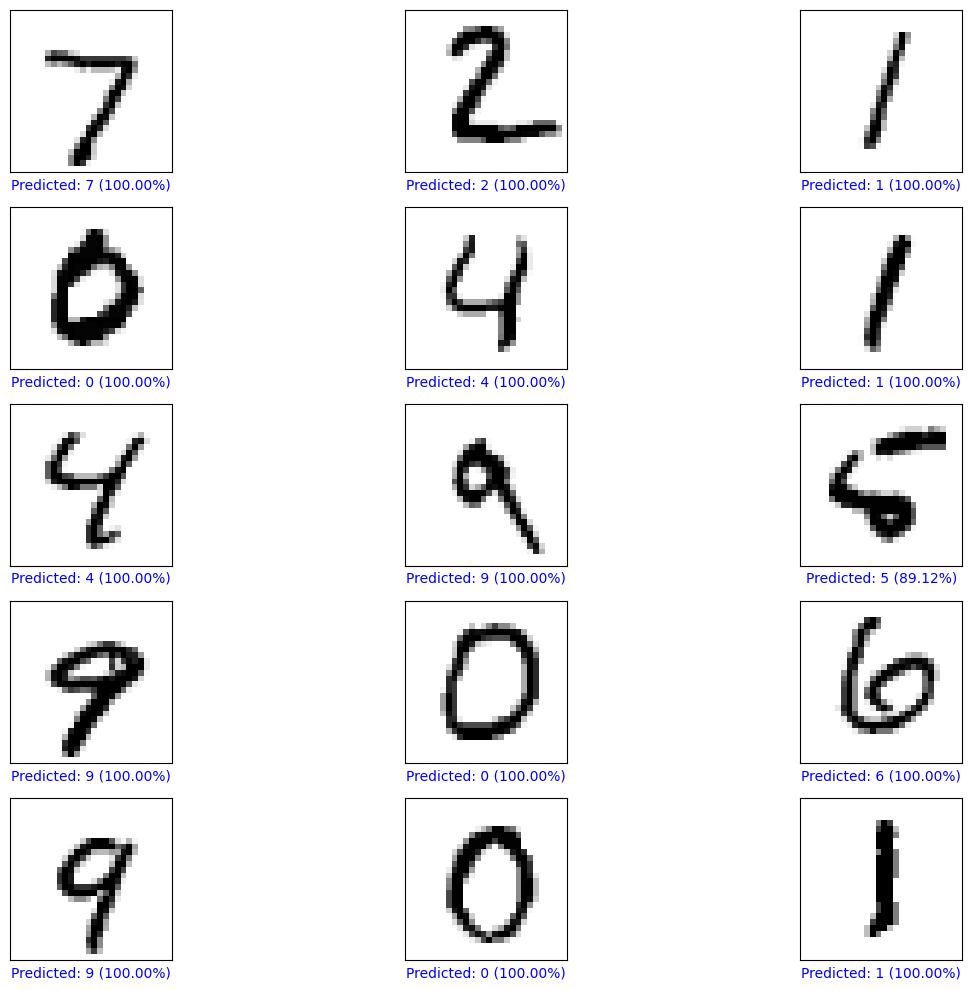

In [9]:
import matplotlib.pyplot as plt

# Função para exibir o dígito e seu rótulo previsto
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f'Predicted: {predicted_label} ({100 * tf.reduce_max(predictions_array):.2f}%)', color=color)

# Traçando as primeiras imagens de teste e suas previsões
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 6ms/step


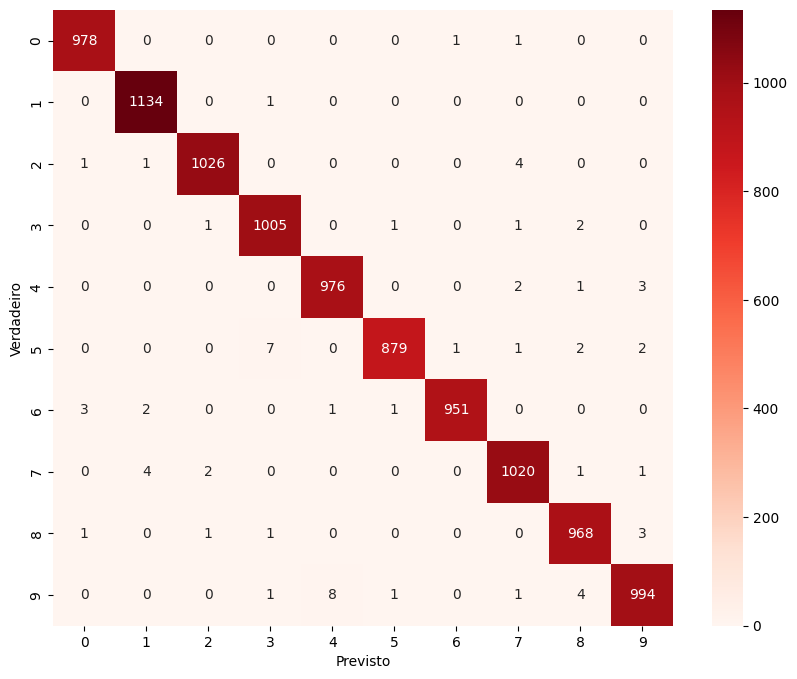

In [10]:
# Matriz de Confusão

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(test_images)
final_predictions = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, final_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [15]:
import cv2
# Carregando e pré-processando a image inserida
input_image = cv2.imread('exemplo2.png', cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (28, 28))
input_image = input_image / 255.0  # Normalizando valores de pixel
input_image = input_image.reshape(1, 28, 28, 1)  # Remodelando para entrada do modelo

In [16]:
import numpy as np
# Usando o modelo treinado para realizar predições
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 26ms/step


Predicted label: 4


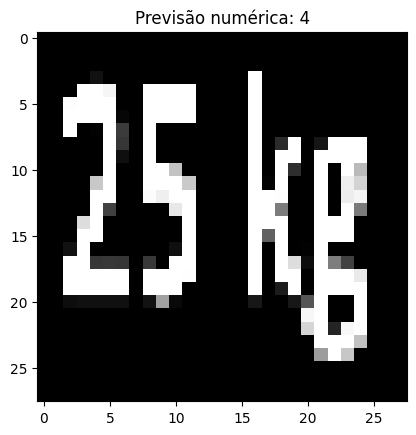

In [17]:
print(f'Predicted label: {predicted_label}')

# Exibindo a imagem de entrada
import matplotlib.pyplot as plt
plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f'Previsão numérica: {predicted_label}')
plt.show()